Loading Packages

In [1190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import pearsonr


Loading Used Cars Dataset into a pandas dataframe

In [1191]:
df = pd.read_csv('/content/used_cars_data.csv')

In [1192]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [1193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Dropping S.no and new price column

In [1194]:
df = df.drop(columns = ['S.No.', 'New_Price'])

In [1195]:
df.shape

(7253, 12)

In [1196]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#1. **Transformation**

Checking Column Datatypes

In [1197]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [1198]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

I checked if the columns Mileage Engine Power have any null values before using a regular expression to see if all of them are in a similar pattern. For example
Mileage values look like 26.6 kmpl or "NUM TXT" format.
I only see KM/Kg and KM/L there might be more so grouping is important.


km/L= 1/ (km/kg×gas density)
​km/L = 0.140km/L

In [1199]:
import re
kmpl, Nans, kmkg, others = 0,0,0,0
for index, i in enumerate(df['Mileage']):

  if i == None or str(i) == 'nan':
    Nans += 1

  elif re.search('kmpl', str(i), re.IGNORECASE):
    kmpl += 1

  elif re.search('km/kg', str(i), re.IGNORECASE):
    kmkg += 1

  else:
    others+= 1


print('kmpl: ',kmpl ,'Nans: ', Nans, 'kmkg: ',kmkg , 'others: ',others)

total = 0
total = kmpl + Nans + kmkg + others
print('total: ',total)

kmpl:  7177 Nans:  2 kmkg:  74 others:  0
total:  7253


So we found out that there are only two types other than Nans, that makes our job easy, we just need to convert km/kg values into kml and then drop the string part of the column

In [1200]:
import re
kmpl, Nans, kmkg, others = 0,0,0,0
for index, i in enumerate(df['Mileage']):

  if i == None or str(i) == 'nan':
    print(type(i))
    Nans += 1

  elif re.search('kmpl', str(i), re.IGNORECASE):
    kmpl += 1

  elif re.search('km/kg', str(i), re.IGNORECASE):
    kmkg += 1
    number = re.search(r'\d+', str(i)).group()
    #converting km/kg to kmpl
    df['Mileage'][index] = 1.40 * float(number)

  else:
    others+= 1


print('kmpl: ',kmpl ,'Nans: ', Nans, 'kmkg: ',kmkg , 'others: ',others)

total = 0
total = kmpl + Nans + kmkg + others
print('total: ',total)

<class 'float'>
<class 'float'>
kmpl:  7177 Nans:  2 kmkg:  74 others:  0
total:  7253


<ipython-input-1200-2be0cf1c4f27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][index] = 1.40 * float(number)


Since there is no direct way of converting kmkg we can go ahead and drop the kmkg since they are so low


In [1201]:
kmpl = 0
for index, i in enumerate(df['Mileage']):

  if re.search('kmpl', str(i), re.IGNORECASE):
    number = re.search(r'\d+', str(i)).group()
    df['Mileage'][index] = float(number)
df['Mileage'] = df['Mileage'].astype(float)

<ipython-input-1201-36ada165c0ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][index] = float(number)


In [1202]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.4,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968 CC,140.8 bhp,5.0,17.74


In [1203]:
print(df['Mileage'].count)

<bound method Series.count of 0       36.4
1       19.0
2       18.0
3       20.0
4       15.0
        ... 
7248    20.0
7249    17.0
7250    23.0
7251    17.0
7252    10.0
Name: Mileage, Length: 7253, dtype: float64>


Checking the Similar thing with **Engine**


In [1204]:
import re
cc, Nans, others = 0,0,0
for i in df['Engine']:

  if i == None or str(i) == 'nan':
    Nans += 1

  elif re.search('cc', str(i), re.IGNORECASE):
    cc += 1

  else:
    others+= 1

print('cc: ',cc ,'Nans: ', Nans,'others: ',others)

total = 0
total = cc + Nans  + others
print('total: ',total)

cc:  7207 Nans:  46 others:  0
total:  7253


as we can see the string type is only cc and rest all are Nans, makes our job easy, we can convert the object into an integer.

In [1205]:
Nans = 0
for index, i in enumerate(df['Engine']):
  if i == None or str(i) == 'nan':
    Nans += 1

  elif re.search('cc', str(i), re.IGNORECASE):
    number = re.search(r'\d+', str(i)).group()
    df['Engine'][index] = float(number)

df['Engine'] = df['Engine'].astype(float)

<ipython-input-1205-59699978262b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'][index] = float(number)


checking the similar thing with **power**

In [1206]:
import re
bhp, Nans, others = 0,0,0
count = 5
null = 0
null1 = 0
others1 = []
for i in df['Power']:

  if i == None or str(i) == 'nan':
    Nans += 1

  elif re.search('bhp', str(i), re.IGNORECASE):
    bhp += 1
    others1.append(i)
  elif re.search('null', str(i), re.IGNORECASE):
    null += 1
  elif re.search(r'\d+', str(i), re.IGNORECASE):
    null1 += 1
  else:

    others += 1

    while count>0:
      count -= 1
      print(i)

print('bhp: ',bhp ,'Nans: ', Nans,'others: ',others, 'null', null, 'numbers', null1)

total = 0
total = bhp + Nans  + others
print(others1)
print('total: ',total)

bhp:  7207 Nans:  46 others:  0 null 0 numbers 0
['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp', '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp', '103.25 bhp', '116.3 bhp', '74 bhp', '187.7 bhp', '115 bhp', '175.56 bhp', '98.6 bhp', '74 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp', '177.01 bhp', '80 bhp', '103.6 bhp', '116.3 bhp', '63.1 bhp', '67.1 bhp', '88.7 bhp', '102 bhp', '108.45 bhp', '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp', '88.5 bhp', '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp', '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp', '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '74 bhp', '75 bhp', '74 bhp', '82 bhp', '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '67.1 bhp', '147.8 bhp', '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp', '194 bhp', '88.5 bhp', '88.7 bhp', '500 bhp', '140 bhp', '78.9 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', 'null bhp', '132 bhp', '102 bhp', 'null b

No signs of other measuring unit so we can covert it into integer ignoring the unit.

In [1207]:
nan = 0
for index, i in enumerate(df['Power']):
  if i == None or str(i) == 'nan':
    nan += 1

  elif re.search('bhp', str(i), re.IGNORECASE):
    df['Power'][index] = str(i)[:-4]



<ipython-input-1207-e1b39fb580db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][index] = str(i)[:-4]


In [1208]:
nan = 0
for index, i in enumerate(df['Power']):
  if i == None or str(i) == 'nan' or str(i) == 'null':
    nan += 1



print(nan)

175


In [1209]:
for index, i in enumerate(df['Power']):
  if i == None or str(i) == 'nan' or str(i) == 'null':
    df['Power'][index] = None

df['Power'] = df['Power'].astype(float)

<ipython-input-1209-2ba0bd9c8504>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][index] = None


In [1210]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

# **2. Outlier and Correlations**

## **2.1 Add New Column**

In [1211]:
#car age

df['Car_Age'] = 2024 - df['Year']
df['Car_Age'].isnull().sum()
df['Car_Age'].astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.4,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.80,5.0,17.74,11


In [1212]:
df['Year'].min()


1996

In [1213]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.4,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.80,5.0,17.74,11


mileage of the car depends on the name, car_age, fuel_type



Calculate IQR first, so sort the data and then split the the data in 25% and 75% split

In [1214]:
def Q1_Q3_IQR(col):
  data = sorted(col)
  n = len(col)
  q1_index = n//4
  q3_index = 1 - q1_index


  q1 = data[q1_index] if n%4 == 0 else (data[q1_index] + data[q1_index-1])/2
  q3 = data[q3_index] if n%4 == 0 else (data[q3_index] + data[q3_index+1])/2


  return q1, q3, q3-q1


Please check and print outliers based on IQR and draw box-plots accordingly for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

In [1215]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_Age                int64
dtype: object

Q1, Q3, IQR  8.0 13.0 5.0
Outliers in Car_Age: 58


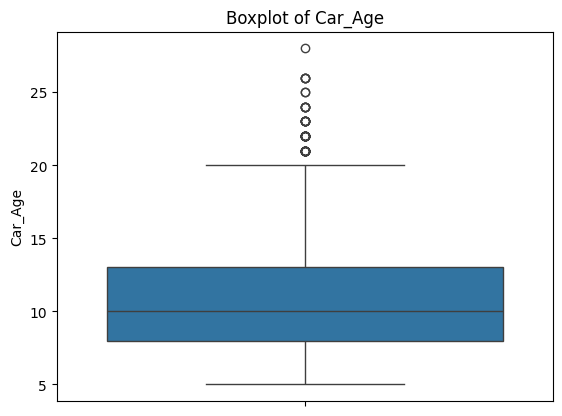

Q1, Q3, IQR  34000.0 73000.0 39000.0
Outliers in Kilometers_Driven: 258


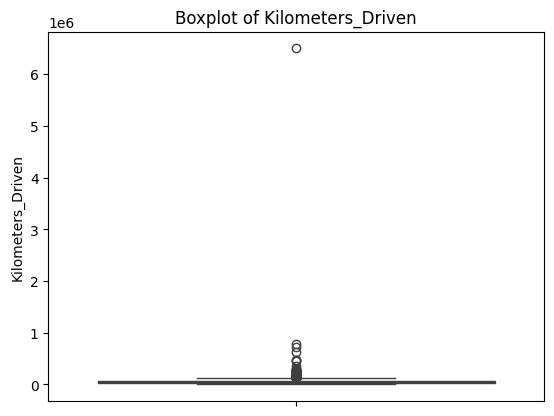

Q1, Q3, IQR  15.0 21.0 6.0
Outliers in Mileage: 131


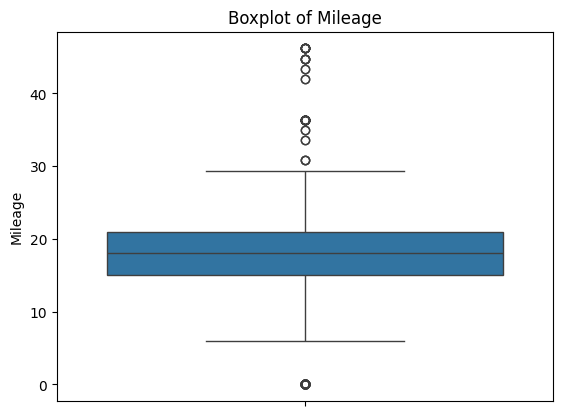

Q1, Q3, IQR  1198.0 1968.0 770.0
Outliers in Engine: 65


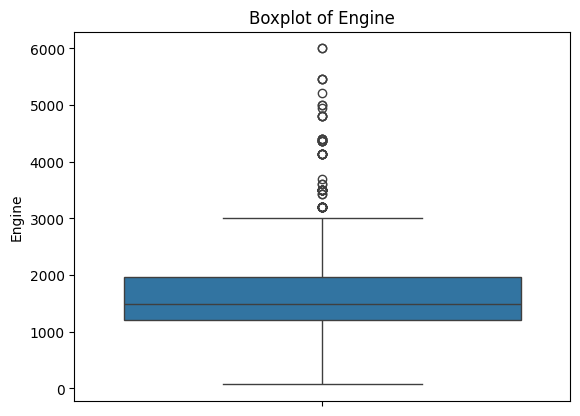

Q1, Q3, IQR  75.0 138.1 63.099999999999994
Outliers in Power: 273


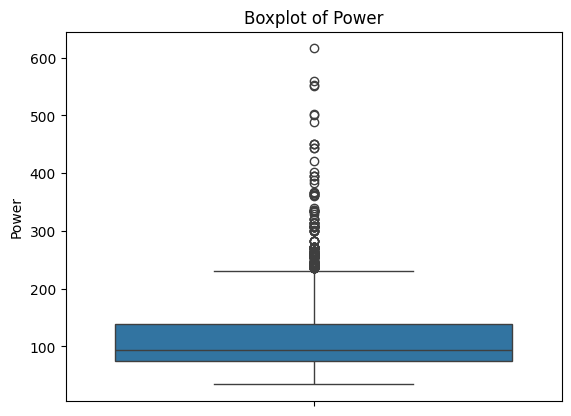

Q1, Q3, IQR  5.0 5.0 0.0
Outliers in Seats: 1153


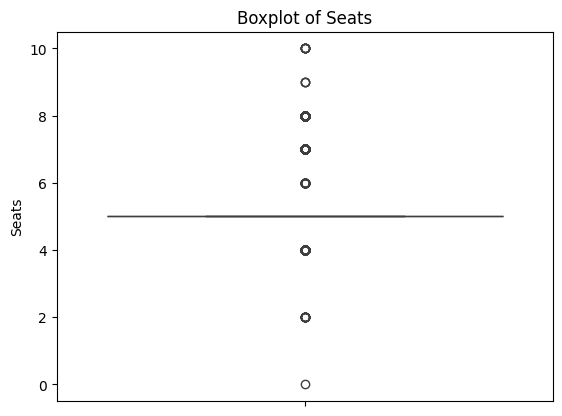

Q1, Q3, IQR  3.5 9.95 6.449999999999999
Outliers in Price: 718


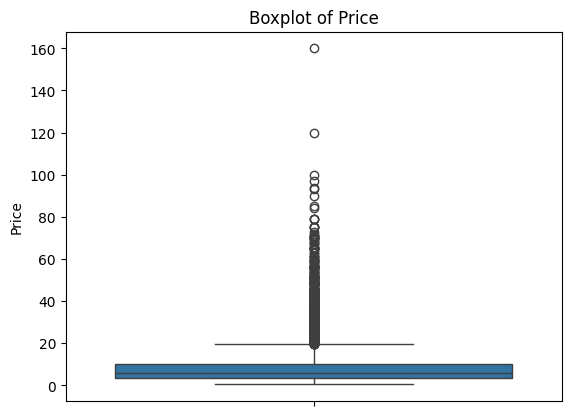

In [1216]:
columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Calculate IQR and identify outliers for each column
for col in columns:
    Q1  = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Q1, Q3, IQR ",Q1, Q3,IQR)
    df_min = df[col].min()
    df_max = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print outliers
    outliers = df[(df[col] < max(lower_bound, df_min)) | (df[col] > min(df_max,upper_bound))][col]
    print(f"Outliers in {col}: {len(outliers.tolist())}")

    # Create boxplot
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Summary of boxplot obersevation**:
Car_Age             -0.305327
Kilometers_Driven   -0.011493
Mileage             -0.302888
Engine               0.658354
Power                0.772566
Seats                0.052225
Price                1.000000

used min max of maximum and lower bound and upper bound to calculate the upper and lower bound this boxplot are, there are more outliers over the upperbound than the lowerbound.

Correlation coefficients with Price:
Car_Age             -0.305327
Kilometers_Driven   -0.011493
Mileage             -0.302888
Engine               0.658354
Power                0.772566
Seats                0.052225
Price                1.000000
Name: Price, dtype: float64


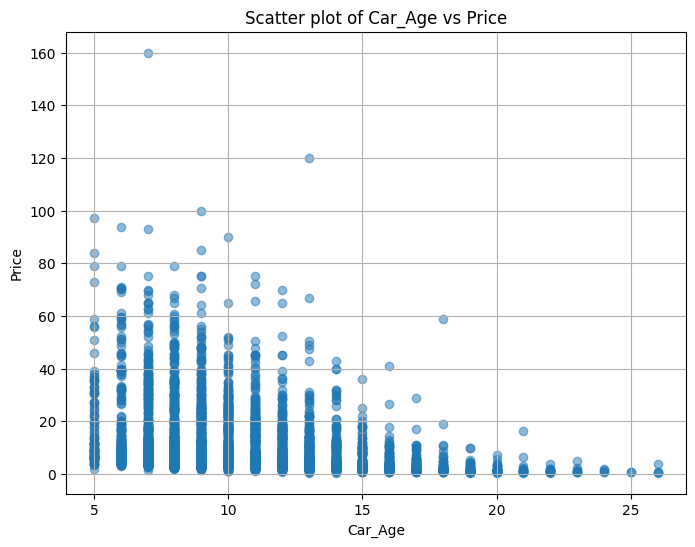

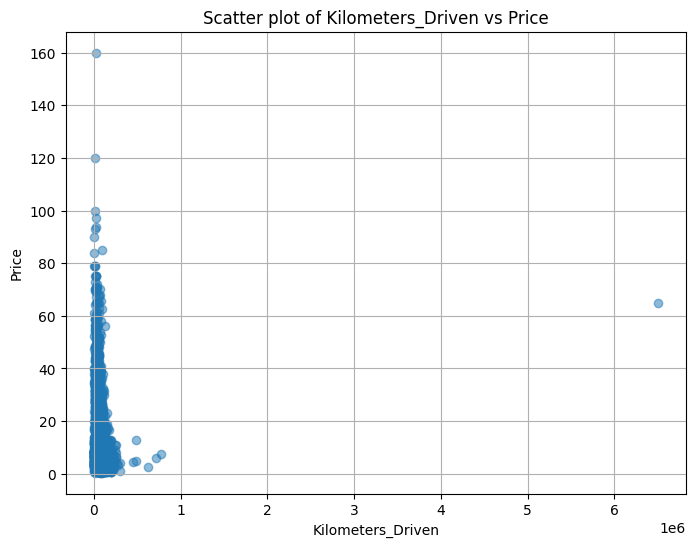

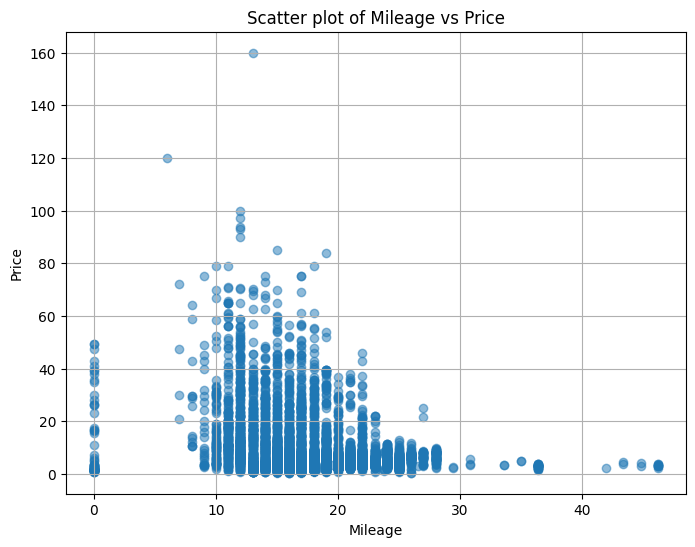

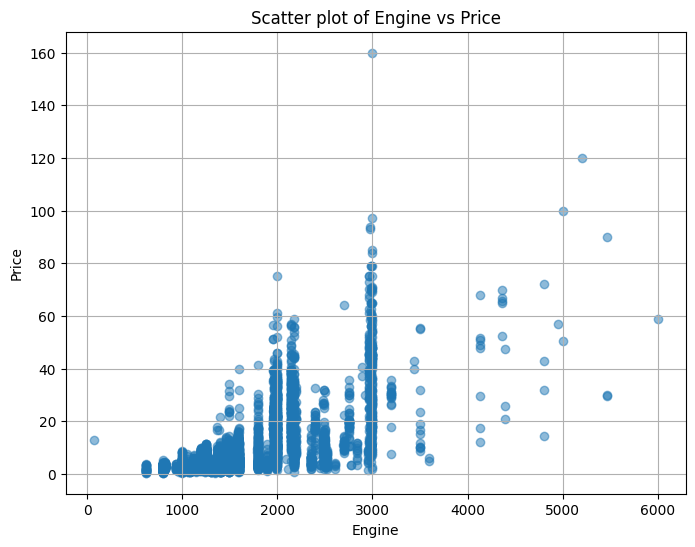

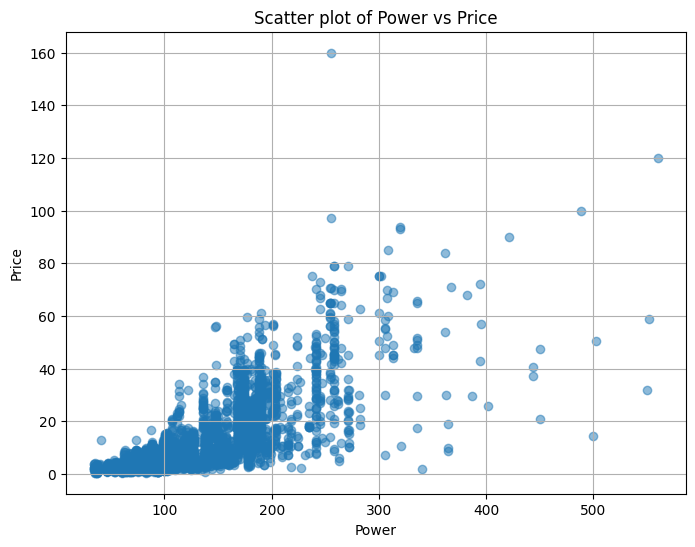

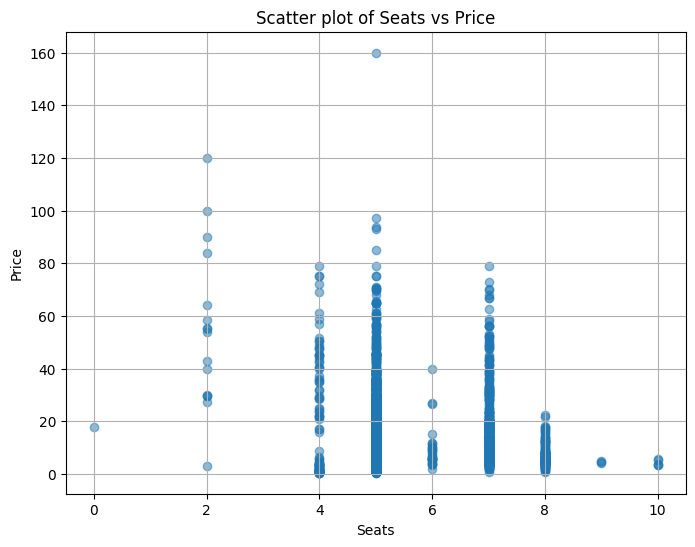

In [1217]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns

# Compute correlation matrix
correlation_matrix = df[['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr()

# Extract correlation coefficients with Price
correlation_with_price = correlation_matrix['Price']

# Print correlation coefficients
print("Correlation coefficients with Price:")
print(correlation_with_price)

# Create scatter plots
for column in ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['Price'], alpha=0.5)
    plt.title(f'Scatter plot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

**Summary of scatterplot obersevation**:
Car_Age             -0.305327
Kilometers_Driven   -0.011493
Mileage             -0.302888
Engine               0.658354
Power                0.772566
Seats                0.052225
Price                1.000000

the car age and price seem to have a negative correlation as the age of the car is more the price decreases. the kilometers drive has a similar pattern.
Engine and power have positive correlation with price
price increase when there is more engine and power
seats have a slightest positive relation not entirely.

In [1218]:
#saving a copy of this dataset before imputing them
df_with_na = df

## 3. Handling Missing Values

There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please
impute the missing values using subclass (subgroups). As discussed during lecture, categorical or discrete
features use mode and continuous features use mean or median for all samples belonging to the same subclass.
Please justify your choice of mode, mean, or median in each case.
NOTE:
If imputing using a subclass or multiple subclasses does not get rid of all the missing values, please impute
using the subclass as much as you can. Then, the remaining rows can be used without using subclass.



<ipython-input-1219-bbfa87a53bd3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


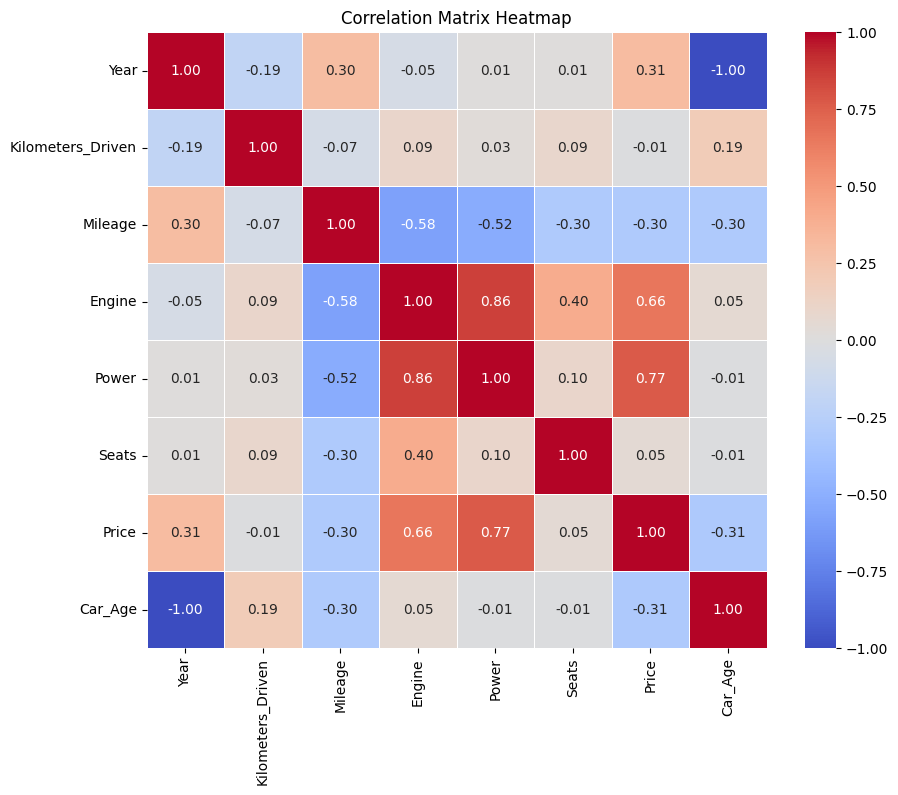

In [1219]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


strategy: Mileage Engine Power Price are all continuous variables so we need to use mediam or mean.

only seats are discrete so have to use mode.

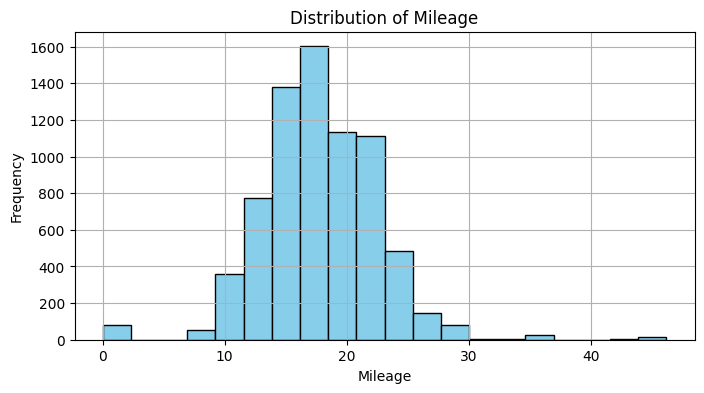

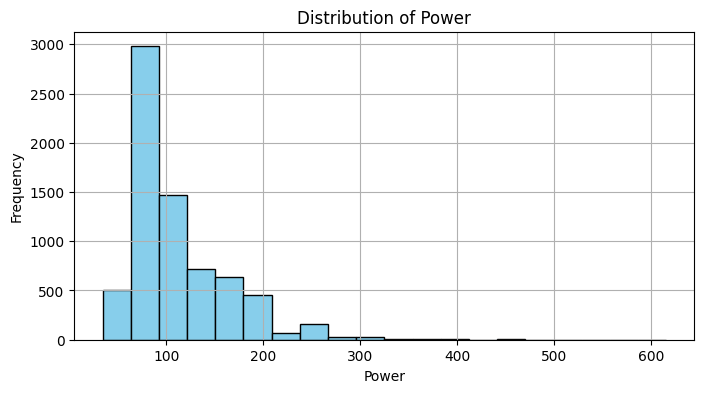

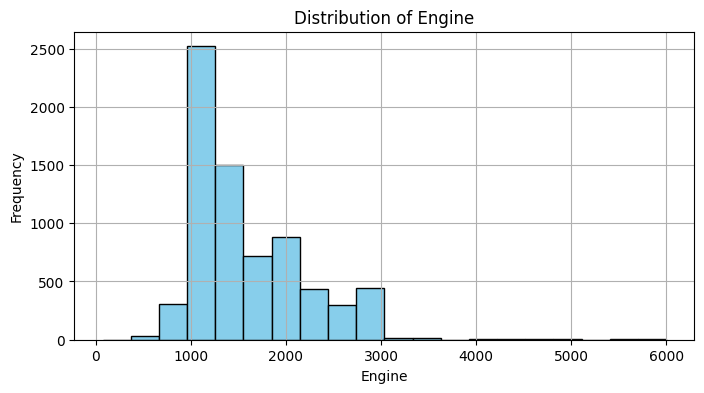

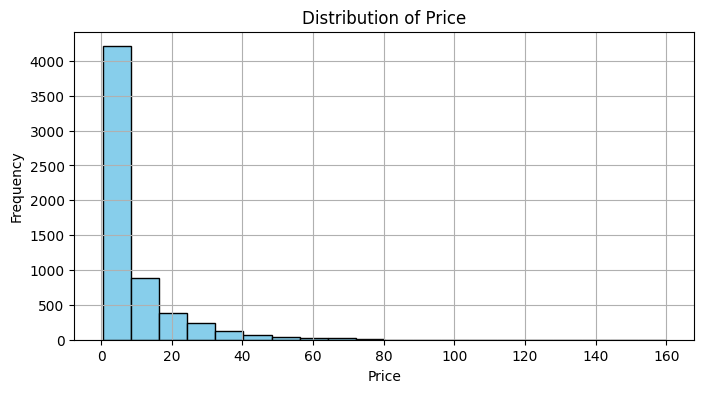

In [1220]:
import matplotlib.pyplot as plt

columns = ['Mileage', 'Power', 'Engine', 'Price']

for column in columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

if we look at distribution charts we might get a better view how to impute values with mean median or mode. for the rest of the columns

Mileage is evenly distributed so we can use median or mean

In [1221]:
#creating a column called brand and putting the first word of the car in it
df['Brand'] = df['Name'].str.split(' ', 1).str[0]

<ipython-input-1221-130e91ad29fb>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Brand'] = df['Name'].str.split(' ', 1).str[0]


### Seats imputation, Using the name/brand and seats mode to impute *seats*

Now to impute engine we group by brand and then also power since they are correlated to each other.

In [1222]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
dtype: int64

In [1223]:
df['Seats'].mode()


0    5.0
Name: Seats, dtype: float64

In [1224]:

def impute_with_mode(group):
    mode_values = group['Seats'].mode()

    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        group['Seats'].fillna(mode_value, inplace=True)
    return group

df = df.groupby(['Brand']).apply(impute_with_mode)


<ipython-input-1224-492e25a4da5a>:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby(['Brand']).apply(impute_with_mode)


In [1225]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                   0
Price                1234
Car_Age                 0
Brand                   0
dtype: int64

In [1226]:
def impute_with_mean(group):
    mean_value = group['Mileage'].mean()
    group['Mileage'].fillna(mean_value, inplace=True)
    return group

df = df.groupby(['Brand']).apply(impute_with_mean)

<ipython-input-1226-5c5852cf3c60>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby(['Brand']).apply(impute_with_mean)


In [1227]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                   0
Price                1234
Car_Age                 0
Brand                   0
dtype: int64

Now to impute Engine we use power since it is highly correlated and we group by the brand and we use the price if there is, we can also use mileage as it is negatively correlated. using median because it is postiviely skewed distribution

In [1228]:
def impute_with_median(group):
    median_value = group['Engine'].median()
    df['Engine'].fillna(median_value, inplace=True)
    return group

df.groupby(['Brand','Power']).apply(impute_with_median)

<ipython-input-1228-dd26e09eb441>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby(['Brand','Power']).apply(impute_with_median)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,36.4,998.0,58.16,5.0,1.75,14,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.20,5.0,12.50,9,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.70,5.0,4.50,13,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.76,7.0,6.00,12,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.80,5.0,17.74,11,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.0,1598.0,103.60,5.0,NaN,13,Volkswagen
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.0,1197.0,103.60,5.0,NaN,9,Volkswagen
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.0,1461.0,63.10,5.0,NaN,12,Nissan
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.0,1197.0,103.60,5.0,NaN,11,Volkswagen


Now to impute power we can use engine and brand

In [1229]:
def impute_with_median_power(group):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      median_value = group['Power'].median()
      group.fillna(median_value, inplace=True)
      return group

df = df.groupby(['Brand','Engine'], group_keys=False).apply(impute_with_median_power)


We only have price column to impute we can use power engine and year brand and median of these prices to fill the N/a

In [1230]:
def impute_with_median_price(group):

    median_value = group['Price'].median()
    group.fillna(median_value, inplace=True)
    return group

df = df.groupby(['Brand','Fuel_Type','Year','Power','Engine']).apply(impute_with_median_price)

<ipython-input-1230-39b3deee441b>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby(['Brand','Fuel_Type','Year','Power','Engine']).apply(impute_with_median_price)


In [1231]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
dtype: int64

## 5. Outliers and Correlation with the imputed data points

since we are asked to use a package to calculate the correlation coefficient we use pearsonr

covariance(X, Y) / (stdv(X) * stdv(Y))

---



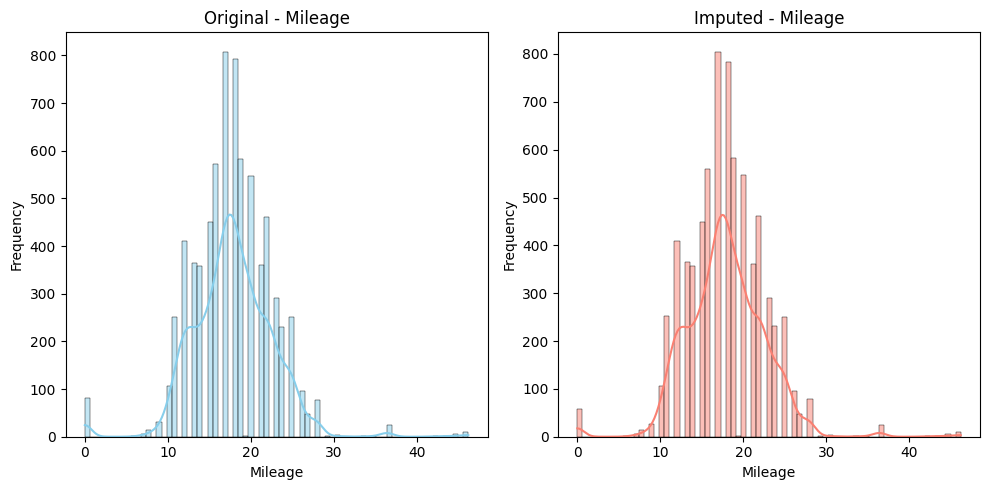

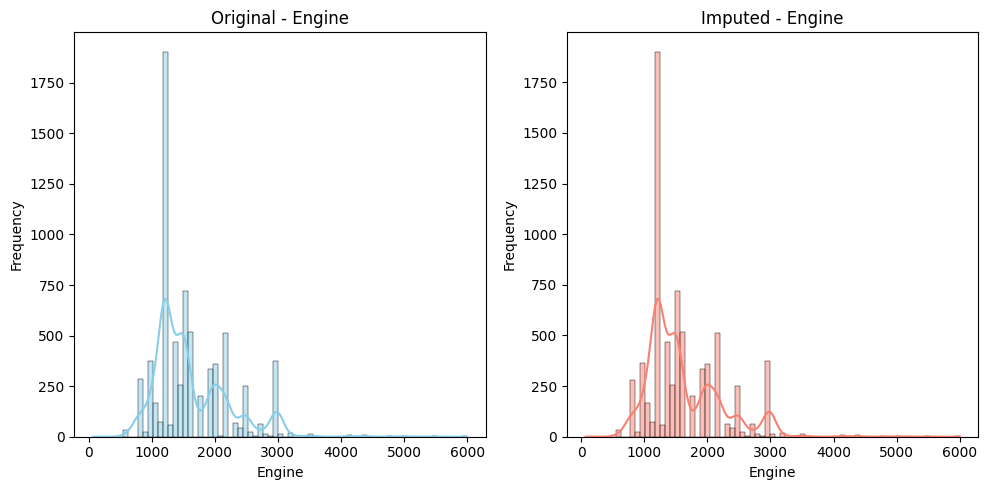

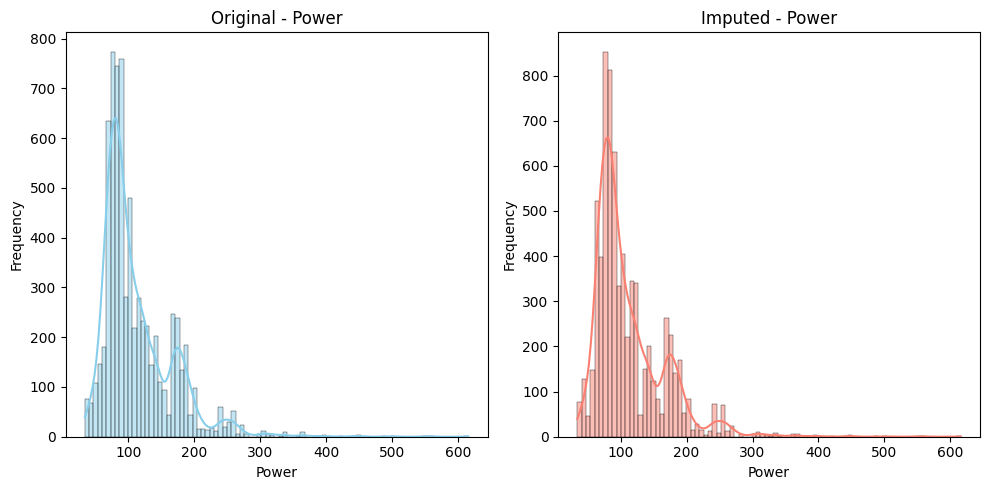

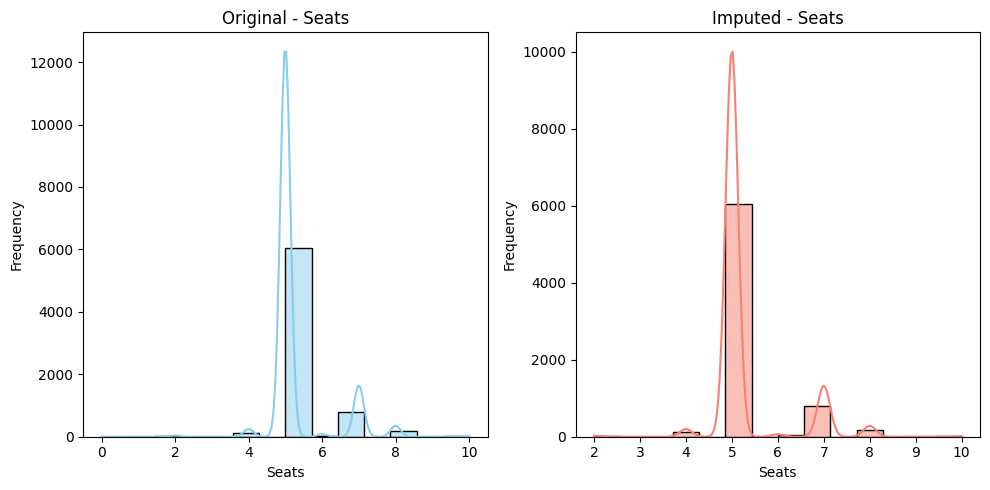

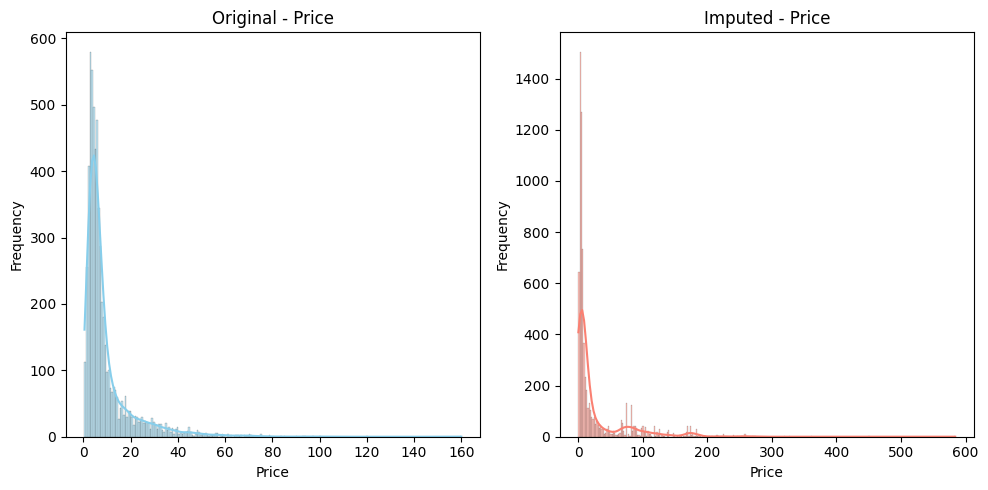

In [1232]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_plot = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))


    plt.subplot(1, 2, 1)
    sns.histplot(df_with_na[col], kde=True, color='skyblue')
    plt.title(f'Original - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(f'Imputed - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


Outliers in Car_Age original : 58
Outliers in Car_Age imputed : 145


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


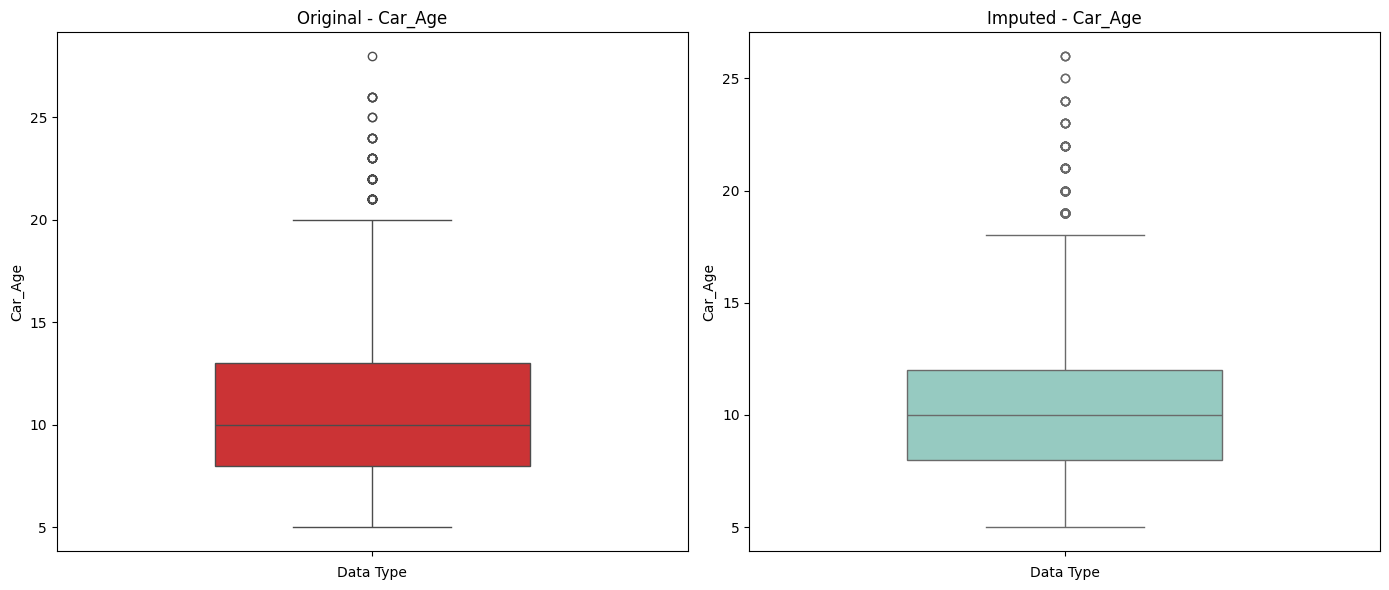

Outliers in Kilometers_Driven original : 258
Outliers in Kilometers_Driven imputed : 255


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


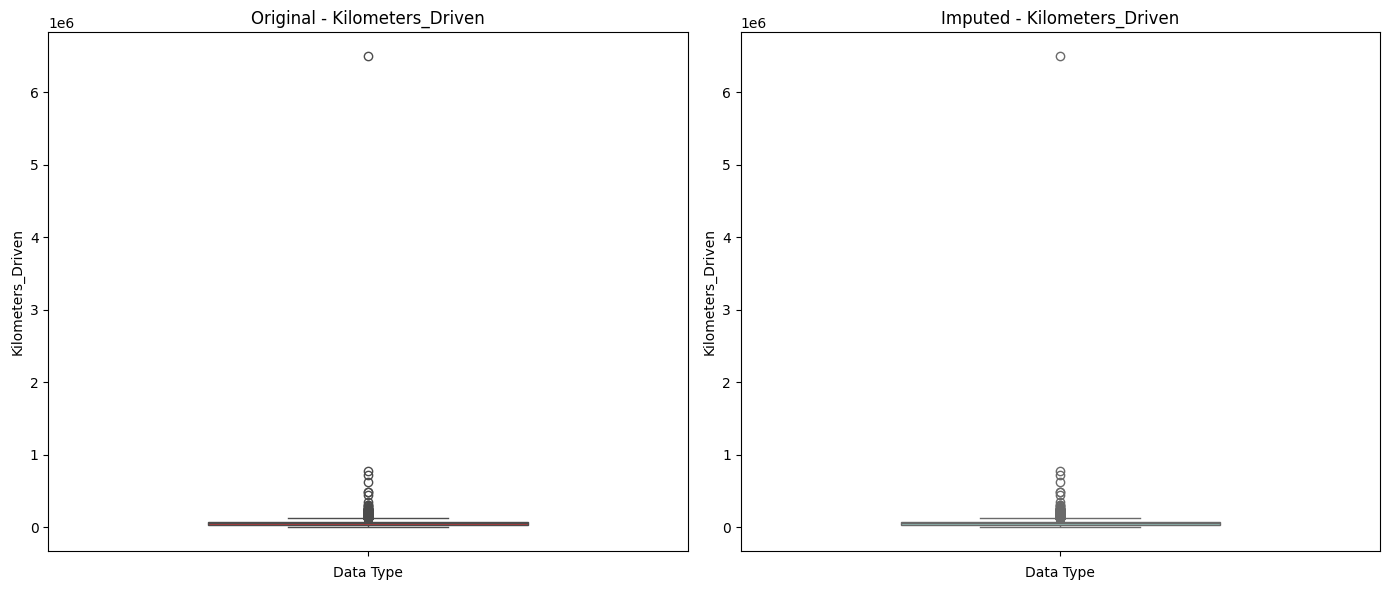

Outliers in Mileage original : 131
Outliers in Mileage imputed : 107


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


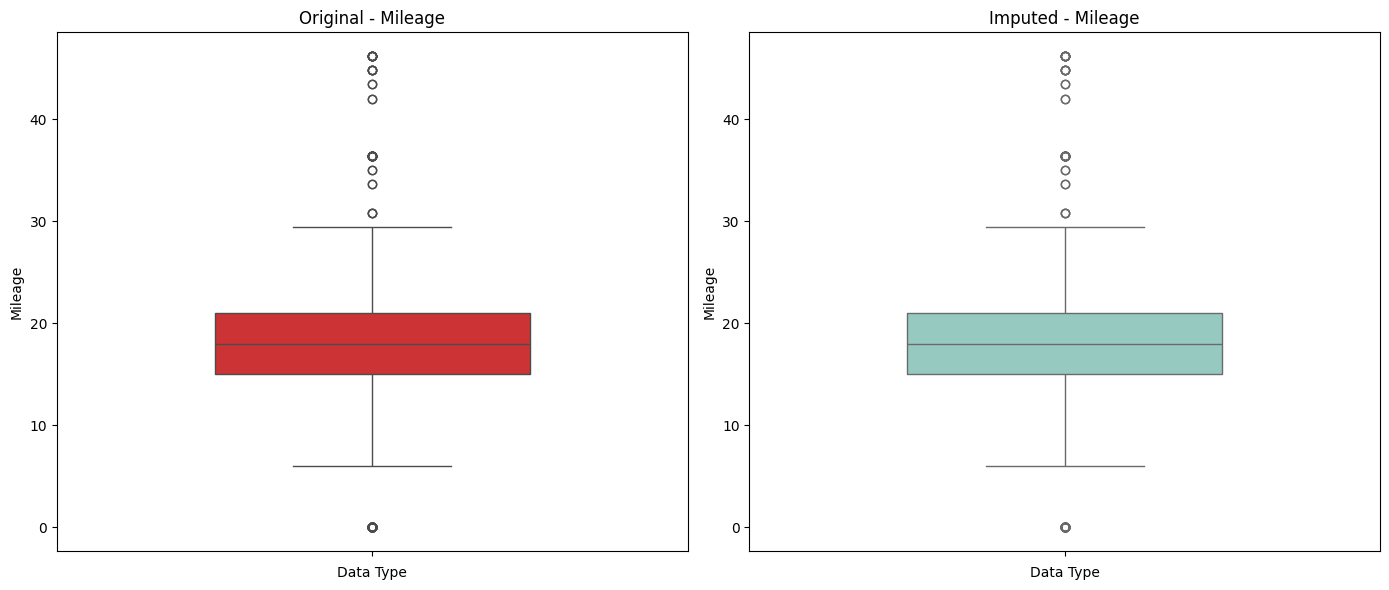

Outliers in Engine original : 65
Outliers in Engine imputed : 62


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


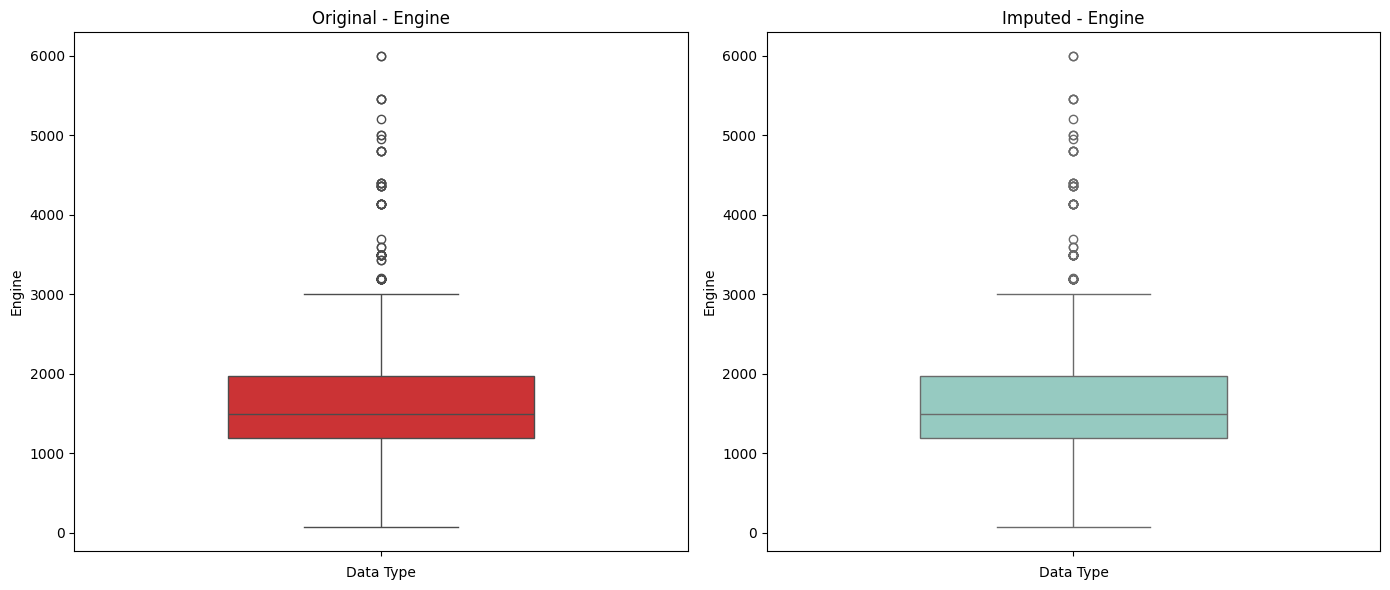

Outliers in Power original : 273
Outliers in Power imputed : 273


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


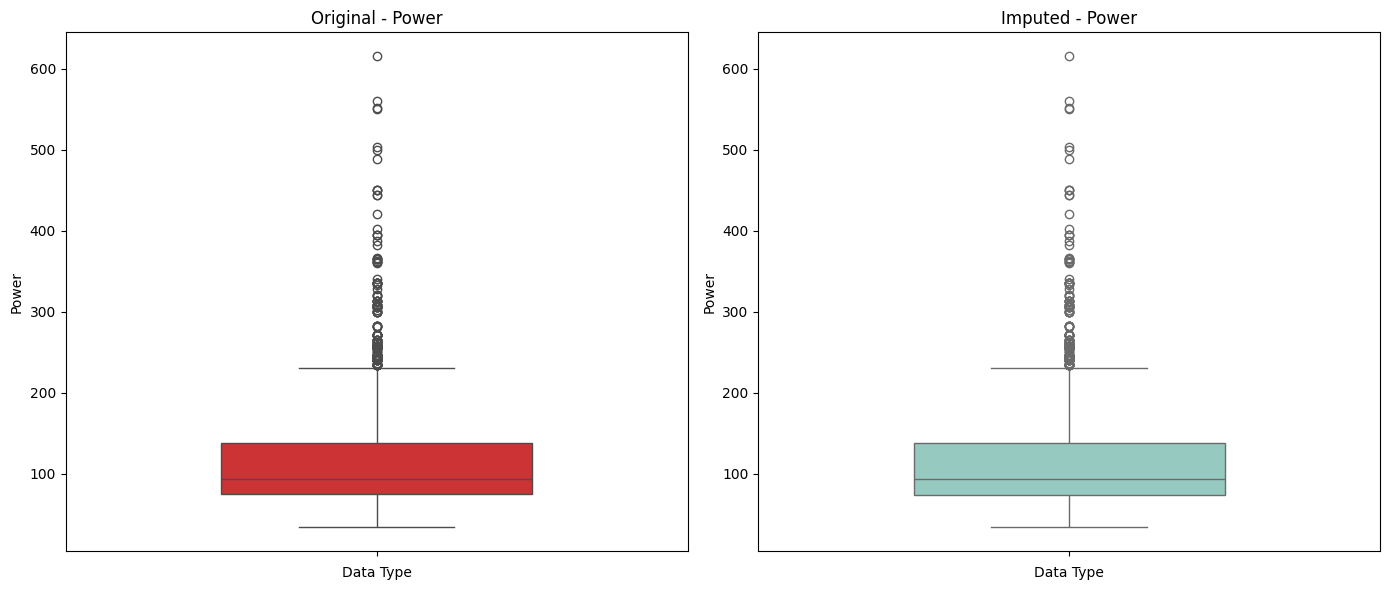

Outliers in Seats original : 1153
Outliers in Seats imputed : 1148


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


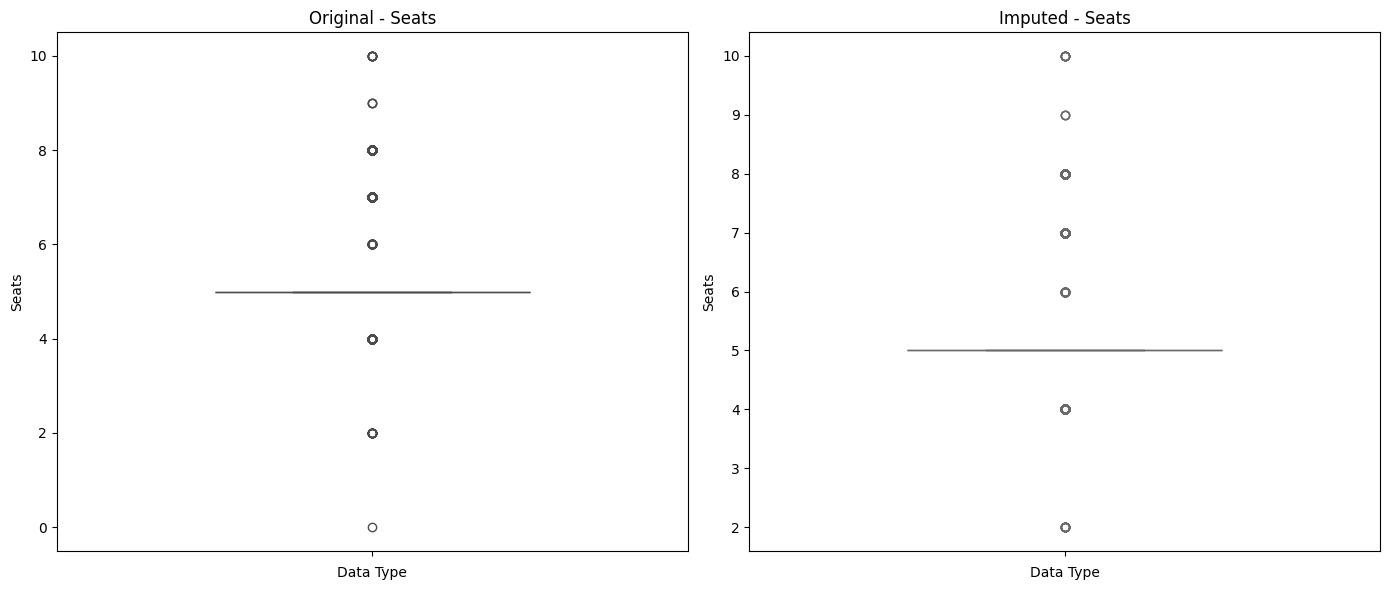

Outliers in Price original : 718
Outliers in Price imputed : 1258


<ipython-input-1233-7e9280bb8782>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
<ipython-input-1233-7e9280bb8782>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')


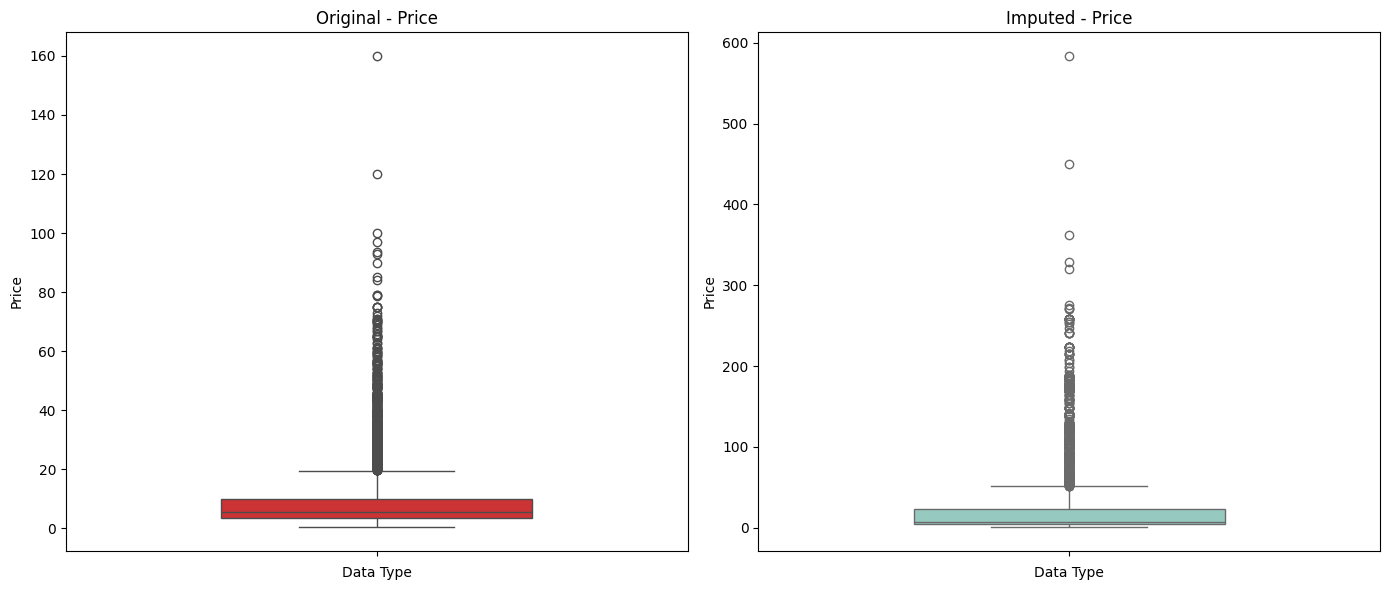

In [1233]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_plot = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


for col in columns_to_plot:
    plt.figure(figsize=(14, 6))
    #with_na
    Q1 = df_with_na[col].quantile(0.25)
    Q3 = df_with_na[col].quantile(0.75)
    IQR = Q3 - Q1
    df_min = df_with_na[col].min()
    df_max = df_with_na[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print outliers with na
    outliers = df_with_na[(df_with_na[col] < max(lower_bound, df_min)) | (df_with_na[col] > min(df_max, upper_bound))][col]
    print(f"Outliers in {col} original : {len(outliers.tolist())}")

    #without na
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_min = df[col].min()
    df_max = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print outliers with na
    outliers = df[(df[col] < max(lower_bound, df_min)) | (df[col] > min(df_max, upper_bound))][col]
    print(f"Outliers in {col} imputed : {len(outliers.tolist())}")

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_with_na[col], orient='v', width=0.5, palette='Set1', color='blue')
    plt.title(f'Original - {col}')
    plt.xlabel('Data Type')
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[col], orient='v', width=0.5, palette='Set3', color='red')
    plt.title(f'Imputed - {col}')
    plt.xlabel('Data Type')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()



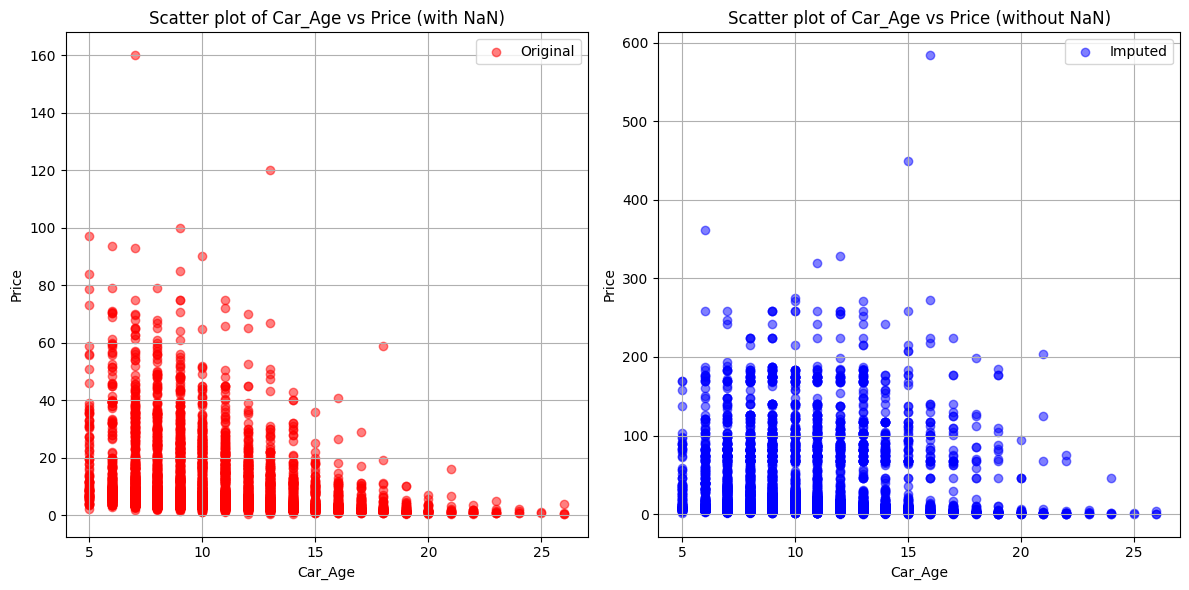

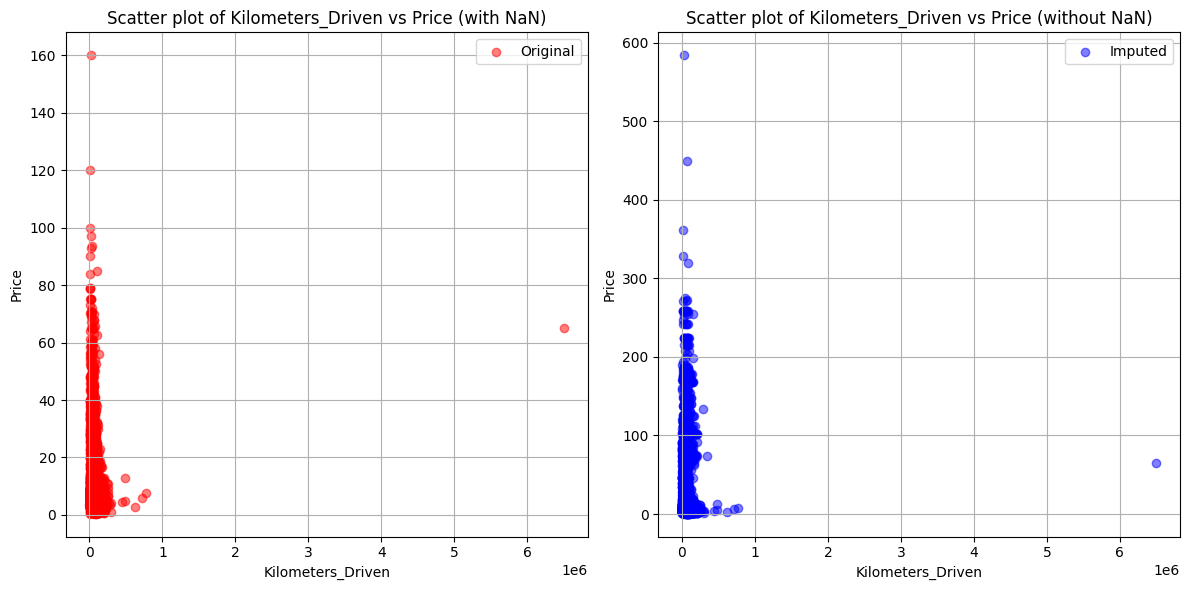

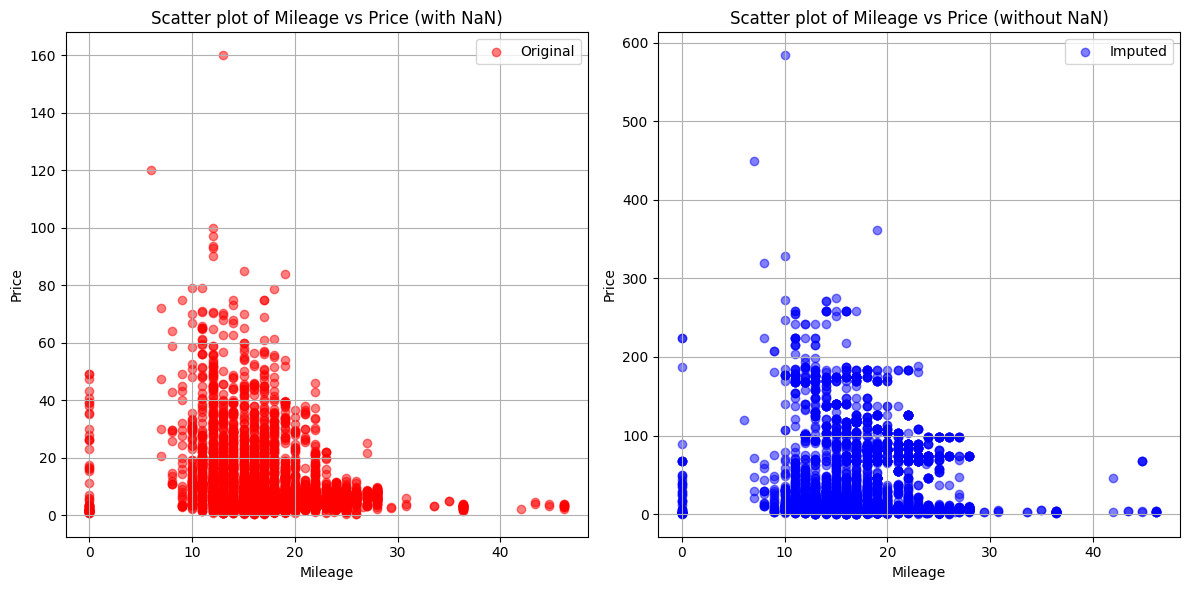

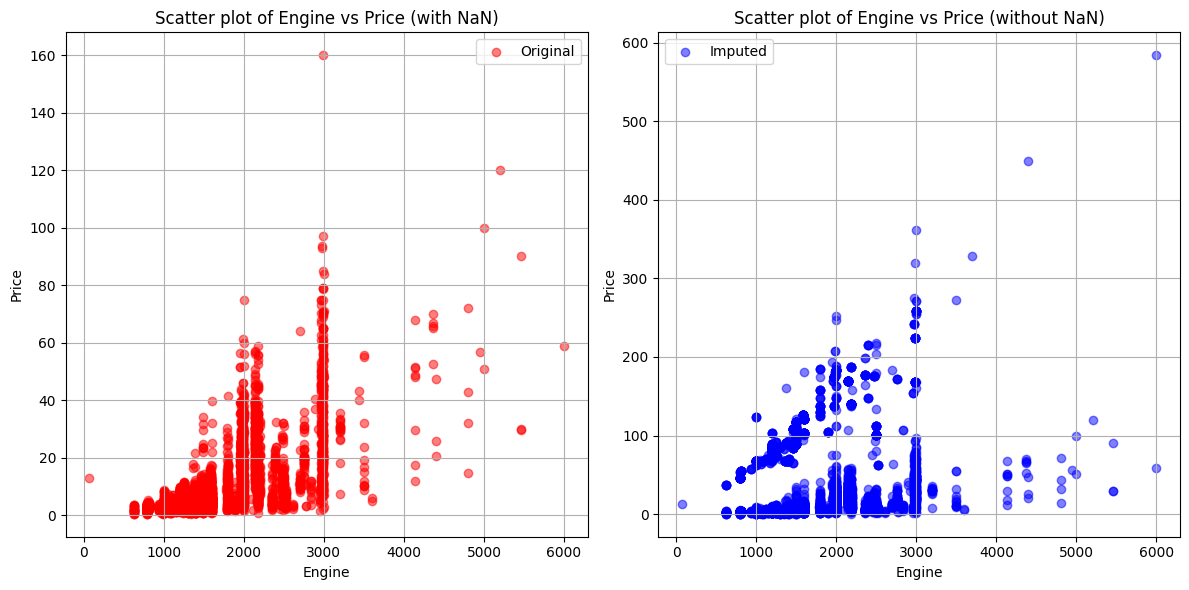

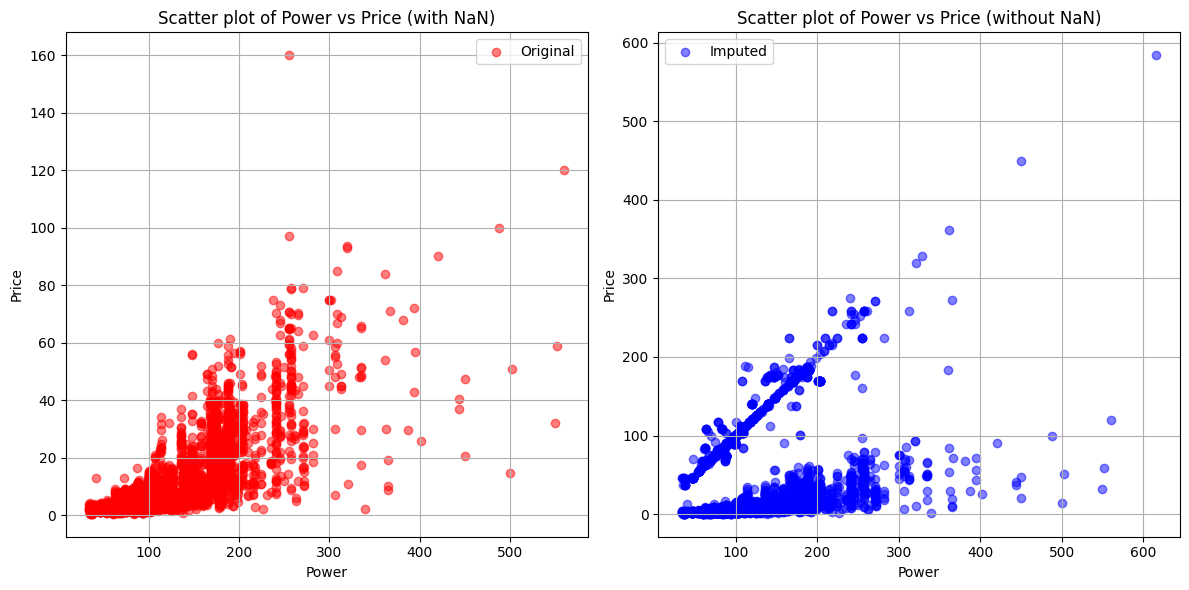

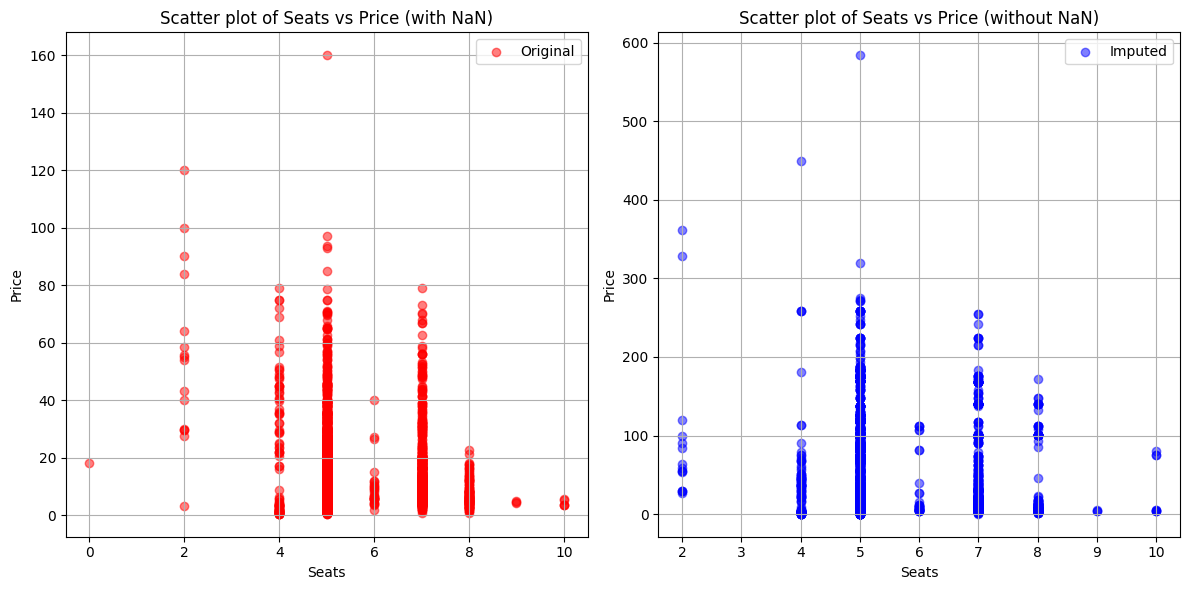

Correlation coefficients with Price (with NaN):
{'Car_Age': -0.3053274083613497, 'Kilometers_Driven': -0.011492790740116143, 'Mileage': -0.30288778499004354, 'Engine': 0.6583536414673558, 'Power': 0.7725658004912175, 'Seats': 0.05222544768179046}

Correlation coefficients with Price (without NaN):
{'Car_Age': -0.06896239084990245, 'Kilometers_Driven': -0.0031248357771959936, 'Mileage': -0.15895705039902228, 'Engine': 0.2780297041852545, 'Power': 0.32518168200762626, 'Seats': 0.029724570448116657}


In [1234]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
correlation_with_price_with_na = {}
correlation_with_price_without_na = {}

for column in columns_to_plot:
    # Scatter plot for DataFrame with NaN values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df_with_na[column], df_with_na['Price'], alpha=0.5, color='red', label='Original')
    plt.title(f'Scatter plot of {column} vs Price (with NaN)')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    # Scatter plot for DataFrame without NaN values
    plt.subplot(1, 2, 2)
    plt.scatter(df[column], df['Price'], alpha=0.5, color='blue', label='Imputed')
    plt.title(f'Scatter plot of {column} vs Price (without NaN)')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Calculate Pearson correlation coefficient for DataFrame with NaN values

    correlation_with_price_with_na[column] = df_with_na[[column, 'Price']].corr().iloc[0, 1]
    # Calculate Pearson correlation coefficient for DataFrame without NaN values
    correlation_coefficient, _ = pearsonr(df[column], df['Price'])
    correlation_with_price_without_na[column] = correlation_coefficient

# Print correlation coefficients
print("Correlation coefficients with Price (with NaN):")
print(correlation_with_price_with_na)
print("\nCorrelation coefficients with Price (without NaN):")
print(correlation_with_price_without_na)


**"Obeservation:"** comparing both the plots the plots seem to have a central tendency now. seats is evenly spread out and in the boxplots the mean of many columns seems to have changed.The outliers seems have decreased in many except the price which have doubled, and the distribution seems have central tendency too. the distribution of power vs price scatter plot seem to have a linear correlation. there diffently an improvement in the overall columns before and after the imputation and there will be positive results if we perform further analysis.


